# Order parameter time evolution

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import networkx as nx
from NetworkFunctions import *
from NetworkClasses import *

In [2]:
N = 100; # number of nodes
m = 2;
G = nx.barabasi_albert_graph(N,m,seed=None); # Barabasi-Albert graph

A = nx.to_numpy_matrix(G); # creates adjacency matrix

w = np.random.uniform(-2, 2, N); # defines natural frequencies
K = .7 # coupling constant
alpha = 1 # SL parameter

# initial conditions
theta0 = np.random.uniform(0, 2*np.pi, N)
rho0 = np.random.uniform(0.1, 0.9, N) # so the system doesn't fall into the attractor
z0 = rho0*np.exp(1j*theta0)

In [3]:
%%time
kuramoto = KuramotoNetwork(w, A, K)
t = np.arange(0,10,.1)
kuramoto.K=1.4
theta, _ = kuramoto.integrate(theta0, t)

CPU times: user 3.83 s, sys: 52.1 ms, total: 3.88 s
Wall time: 3.1 s


## Order Parameter

$$ \mathrm{z}(t) = r(t) e^{i \psi(t)} = \frac{1}{N} \sum_{j=1}^N e^{i \theta_j(t)} $$

In [4]:
def OrderParEvolution(theta):
    
    thetaT = np.transpose(theta)
    N = np.size(theta,0) # number of oscillators
    Nt = np.size(thetaT,0) # number of time values
    r = np.zeros(Nt)
    psi = np.zeros(Nt)
    
    for i in range(Nt):
        order_par = sum(np.exp(thetaT[i]*1j))/N
        r[i] = np.absolute(order_par)
        psi[i] = np.angle(order_par)
        
    return r, psi

<IPython.core.display.Javascript object>


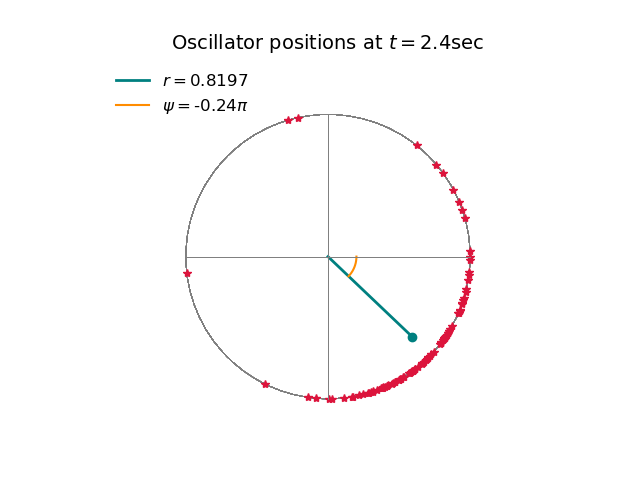

In [5]:
%matplotlib notebook
fig = plt.figure()

ax = fig.add_subplot(111)

# Set moving plots
osc, = ax.plot([], [], marker = '*', linestyle='None', color='crimson')
r_bar, = ax.plot([], [], lw = '2.0', color='teal')
r_dot, = ax.plot([], [], marker='o', linestyle='None', color='teal')
psi_arc, = ax.plot([], [], color='darkorange')

r_t, psi_t = OrderParEvolution(theta)
s = np.arange(0,1.1,.1)

def animate(i):
    
    # Positions of the oscillators
    osc.set_data(np.cos(theta[:,i]), np.sin(theta[:,i]))
    
    # Order Parameter plot
    r = r_t[i]
    psi = psi_t[i]
    r_bar.set_data([0, r*np.cos(psi)],[0, r*np.sin(psi)])
    r_bar.set_label(r'$r=${:.4f}'.format(r))
    r_dot.set_data([r*np.cos(psi)], [r*np.sin(psi)])

    
    # Mean Phase plot
    radius = 0.2
    if r<0.4:
        radius = r/2
    psi_arc.set_data(radius*np.cos(s*psi), radius*np.sin(s*psi))
    psi = psi/np.pi
    psi_arc.set_label(r'$\psi=${:.2f}$\pi$'.format(psi))
    
    ax.set_title(r'Oscillator positions at $t=${:.1f}sec'.format(t[i]), fontsize=14)
    plt.legend(loc=2, frameon=False, fontsize=12)
    
def init():

    ax.set_xlim(-1.6, 1.6)
    ax.set_ylim(-1.2, 1.4)
    ax.set_aspect('equal')
    ax.axis('off')

    # Plots horizontal and vertical diameters of the circle
    ax.plot([-1, 1], [0, 0], lw = '.5', color = 'grey')
    ax.plot([0, 0], [-1, 1], lw = '.5', color = 'grey')

    # Plots unit circle
    circle = plt.Circle((0,0), radius = 1.0, lw = '.5', color = 'grey', fill = False)
    ax.add_patch(circle)
    
    return osc, r_bar, r_dot, psi_arc,

Nt = np.size(theta,1)
t_idx = np.array(range(int(Nt)))
ani = FuncAnimation(fig, animate, t_idx, init_func=init, interval=100, blit=True)

ani.save('anim.mp4')
plt.show()